# Look at the first results of the jet 

## Need: Aggregator files (in the reductions/ and exctracts/ folders) and multiplejets_20220209.txt

This notebook looks at the jets in the subjects, in particular it looks at subject that contain multiple jets detected by the volunteers and checks their performance.  
The list of multiple jets was gained from the Zooniverse talk board where volunteers had used the #multiplejets, other subjects can also be read in to check their results specifically. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from aggregation import Aggregator
plt.style.use('default')
from astropy.io import ascii

Create the aggregator class and load in the reduced data from panoptes

In [2]:
aggregator = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'reductions/shape_reducer_dbscan_box_the_jets.csv')

Load the extractor data (we need this to calculate frame time information)

In [3]:
aggregator.load_extractor_data('extracts/point_extractor_by_frame_box_the_jets.csv',
                               'extracts/shape_extractor_rotateRectangle_box_the_jets.csv')

Load in a list of test subjects for our analysis (these contain multiple jets)

In [4]:
#multijet_subjects = ascii.read('multiplejets_20220209.txt', format='fast_no_header')
problem_subjects=[70439071, 70439072, 70439110, 70439153, 70439154, 70439155,
       70439156, 70439157, 70439158, 70439159, 70439851, 70439853,
       70439854, 70439855, 70439856, 70439857, 70439858, 70439859,
       70439860, 70439861, 70439862, 70439863, 70439864, 70439865,
       70439866, 70439869, 70439870, 70439872, 70439867, 70439868,
       70440614, 70440615, 70440617, 70440625, 70440626, 70440627,
       70440629, 70440630, 70440629, 70440659, 70440710, 70440711,
       70440712, 70440714, 70440715, 70443107, 70443109, 70443110,
       70443111, 70443112, 74593807, 74593809, 74593812, 74593813,
       74593853, 74593854, 74593855, 74593858, 74594237, 74594240,
       74594241, 74594241, 74594423, 74635336, 74635337, 74635338,
       74635338, 74635339, 74635339, 74635340, 74635341, 74635344,
       74635345, 74635346, 74635347, 74635348, 74635349, 74635349,
       74635352, 74635352, 74635353, 74635355, 74635356, 74635358,
       74635359, 74635360, 74635361, 74635362, 74635365, 74635366,
       74635366, 74635367, 74635368, 74635369, 74635371, 74635372,
       74635373, 74635374, 74635375, 74635377, 74635378, 74635378,
       74635379, 74635380, 74635382, 74635383, 74635384, 74635384,
       74635385, 74635386, 74635387, 74635388, 74635388, 74635389,
       74635390, 74635390, 74635394, 74635397, 74635398, 74635399,
       74635400, 74635401, 74635402, 74635405, 74635405, 74635406,
       74635406, 74635407, 74635410, 74635412, 74635413, 74635414,
       74635416, 74635417, 74635420, 74635429, 74635431, 74635443,
       74635445, 74635446, 74635447, 74635448, 74635720, 74635722,
       74635723, 74749419, 74749421, 74749421, 74749428, 74750531,
       74750532, 74750533, 74750535, 74750536, 74750610, 74750611,
       74750619, 74750620, 74750621, 74750622, 74750628, 74750629,
       74750638, 74750639, 74750641, 74750646, 74750681, 74750682,
       74750690, 74750692, 74750710, 74750711, 74750716, 74750717,
       74750718, 74750719, 74750720, 74750721, 74750722, 74750723,
       74750728, 74750729, 74750728, 74750733, 74750734, 74750740,
       74750741, 74750742, 74750753, 74750754, 74750755, 74750756,
       74750757, 74750754, 74750759, 74750765, 74750766, 74750767,
       74750768, 74750769, 74750771, 74750773, 74750774, 74750775,
       74750776, 74750777, 74750777, 74750778, 74750778, 74750779,
       74750782, 74750782, 74750785, 74750786, 74750787, 74750788,
       74750789, 74750790, 74750791, 74750792, 74750793, 74750795,
       74750796, 74750798, 74750799, 74750800, 74750801, 74750802,
       74750803, 74750806, 74750807, 74750808, 74750809, 74750811,
       74750815, 74750818, 74750821, 74750821, 74750826, 74750828,
       74750829, 74750830, 74750832, 74750833, 74750834, 74750835,
       74750836, 74750837, 74750840, 74750842, 74750843, 74750848,
       74750849, 74750857, 74750858, 74750863, 74750868, 74750869,
       74750875, 74750878, 74750880, 74750881, 74750882, 74750883,
       74750884, 74750885, 74750886, 74750887, 74750891, 74750897,
       74751396, 74751397, 74751398, 74751399, 74751400, 74751401]

For each subject (or atleas the first 5), we'll plot out the clusters for the first jet

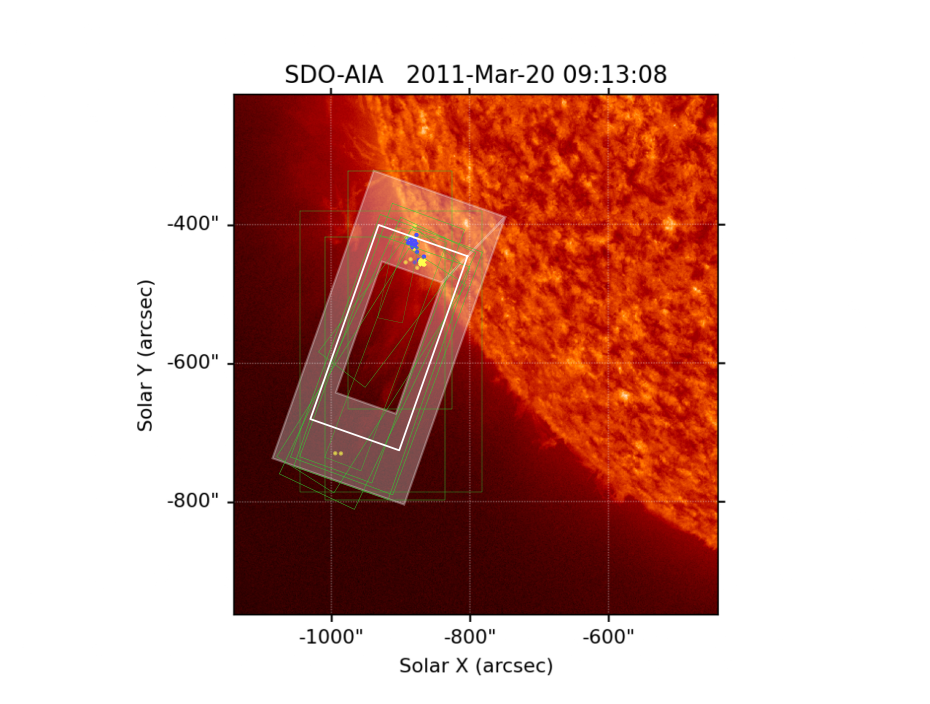

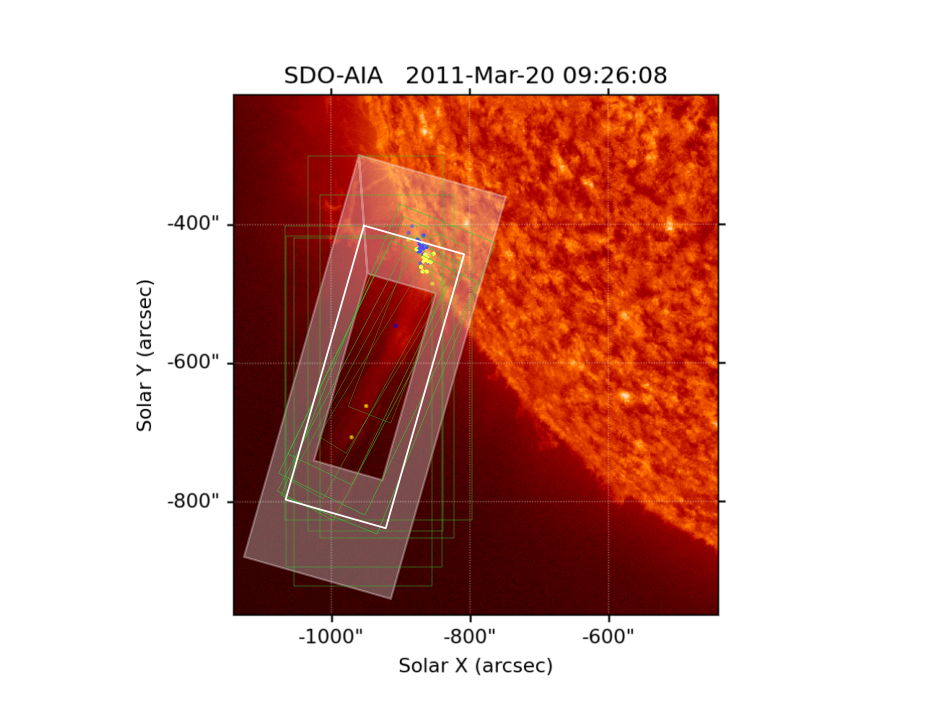

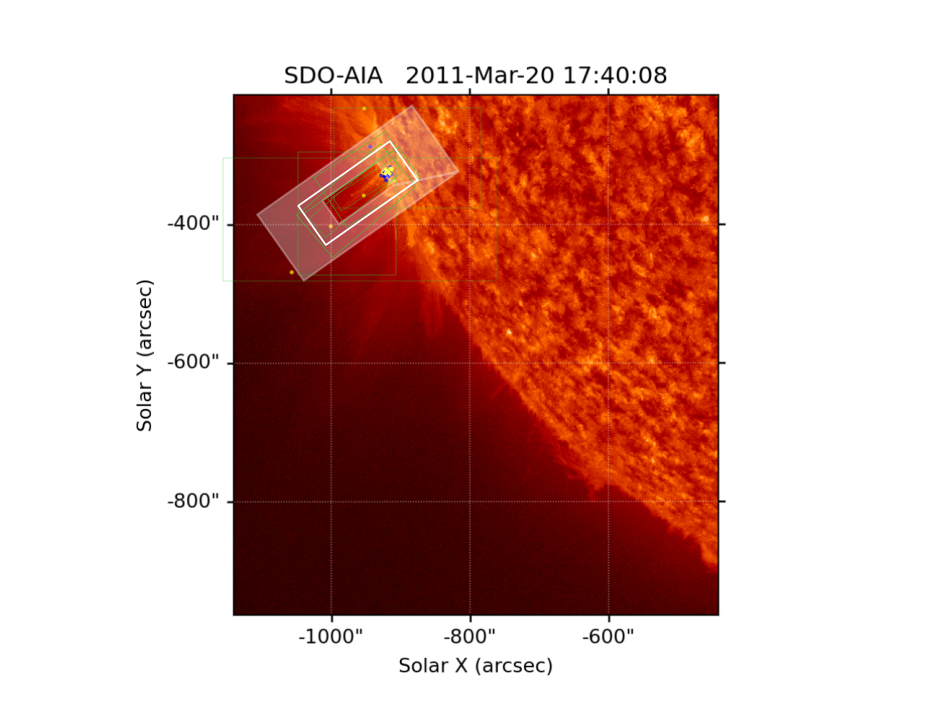

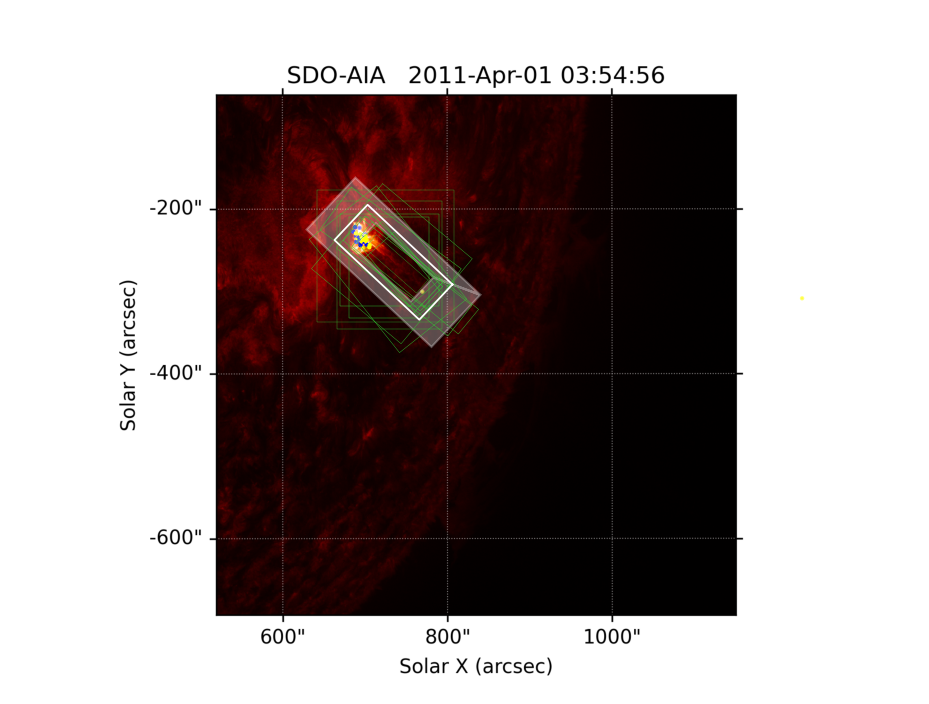

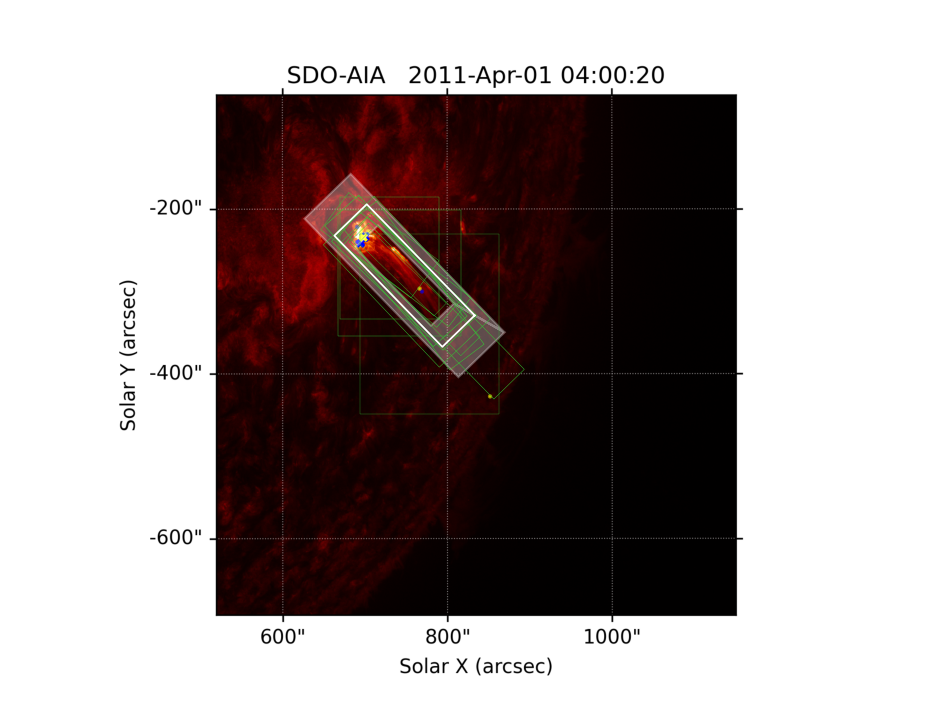

In [5]:
for subject in problem_subjects[:5]:
    ## check to make sure that these subjects had classification
    ## there's some subjects in this list that did not for some reason... (beta subjects?)
    subject_rows = aggregator.points_data[:][aggregator.points_data['subject_id']==subject]
    nsubjects = len(subject_rows['data.frame0.T1_tool0_points_x'])
    
    if nsubjects > 0:
        aggregator.plot_subject(subject, task='T1')
    else:
        print(f"{subject} has no classification data!")

Repeat for frame time information

In [11]:
for subject in multijet_subjects:
    ## same as before, do frame time calculations only for subjects with classifications
    subject_rows = aggregator.points_data[:][aggregator.points_data['subject_id']==subject[0]]
    nsubjects = len(subject_rows['data.frame0.T1_tool0_points_x'])
    
    if nsubjects > 0:
        aggregator.plot_frame_time(subject[0], task='T1')
    else:
        print(f"{subject[0]} has no classification data!")

AttributeError: 'Aggregator' object has no attribute 'plot_frame_time'